# Parameters of the simulated scenario

This notebook loads the optimization problem solved by conlloovia from a pickle file.

The data contains the cloud infrastructure, including the performance of the different container classes on the provided infrastructure, the workload per app, and the optimal allocation of containers and VMs that satisfies the workload with minimum cost.

Nuberu uses a custom conlloovia plugin to read this information and use it in all the simulations presented in the paper

## Initial setup

In [1]:
import pandas as pd
import conlloovia_utils as cu

solution = cu.read_solution("additional_files/data/sol_conlloovia_1_hour_a_2_static_unpredictable_ts_9.p")
system = solution.problem.system
instance_classes = system.ics
container_classes = system.ccs
alloc_df = cu.get_allocation_df(solution.alloc)

## Cloud infrastructure

### Instance and container classes

In [2]:
pd.DataFrame(instance_classes)

,name,price,cores,mem,limit
0,c5.large,0.085 usd / hour,1 core,4 gibibyte,133
1,c5.xlarge,0.17 usd / hour,2 core,8 gibibyte,67
2,c5.2xlarge,0.34 usd / hour,4 core,16 gibibyte,34
3,c6i.large,0.085 usd / hour,1 core,4 gibibyte,125
4,c6i.xlarge,0.17 usd / hour,2 core,8 gibibyte,63
5,c6i.2xlarge,0.34 usd / hour,4 core,16 gibibyte,32


In [3]:
pd.DataFrame(container_classes)

,name,cores,mem,app
0,cc0app0,0.5 core,0.3701171875 gibibyte,{'name': 'app0'}
1,cc1app0,1 core,0.3701171875 gibibyte,{'name': 'app0'}
2,cc2app0,2 core,0.3701171875 gibibyte,{'name': 'app0'}
3,cc0app1,0.5 core,0.548828125 gibibyte,{'name': 'app1'}
4,cc1app1,1 core,0.548828125 gibibyte,{'name': 'app1'}
5,cc2app1,2 core,0.548828125 gibibyte,{'name': 'app1'}


### Performances

In [4]:
cu.get_performances_df(solution.problem.system.perfs)

Container Class,cc0app0,cc0app1,cc1app0,cc1app1,cc2app0,cc2app1
Instance Class,,,,,,
c5.2xlarge,2.10,0.46,4.30,0.96,6.35,1.63
c5.large,2.10,0.46,4.30,0.96,6.35,1.63
c5.xlarge,2.10,0.46,4.30,0.96,6.35,1.63
c6i.2xlarge,2.29,0.50,4.71,1.02,6.82,1.76
c6i.large,2.29,0.50,4.71,1.02,6.82,1.76
c6i.xlarge,2.29,0.50,4.71,1.02,6.82,1.76


### Workload per app

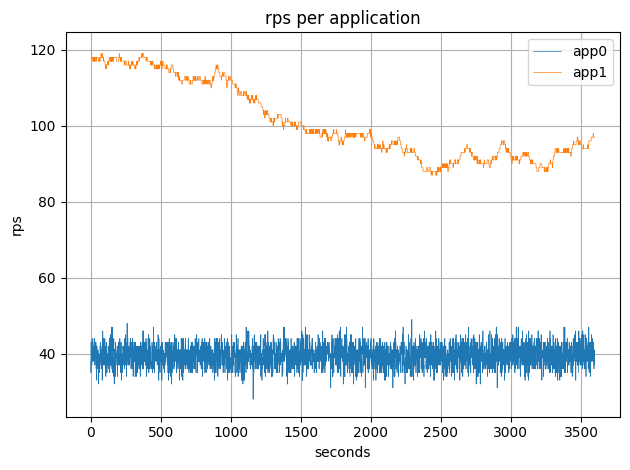

In [5]:
cu.plot_workloads()

In [6]:
cu.workload_summary(solution.problem.workloads) # This is the workload considered by the solver (p95 of the above plots)

,Application,Total requests,rps
0,app0,158400.0,44.0
1,app1,421200.0,117.0


## Solution (allocation)

In [7]:
cu.allocated_vms(alloc_df) # Number of VMs of each instance class

,Instance Class,VM count
0,c6i.2xlarge,25
1,c6i.large,1
2,c6i.xlarge,12


In [8]:
cu.allocated_ccs(alloc_df) # Number of replicas of each container class in each instance class

# replicas
app  Container Class Instance Class            
app0 cc1app0         c6i.2xlarge              8
                     c6i.xlarge               2
app1 cc0app1         c6i.2xlarge              2
     cc1app1         c6i.2xlarge             91
                     c6i.large                1
                     c6i.xlarge              22

In [10]:
alloc_df    # Full detailed allocation

# repl
Instance Class VM name Container Class        
c6i.large      vm56    cc1app1               1
c6i.xlarge     vm04    cc1app1               2
               vm05    cc1app1               2
               vm08    cc1app1               2
               vm10    cc1app0               2
               vm20    cc1app1               2
               vm25    cc1app1               2
               vm33    cc1app1               2
               vm34    cc1app1               2
               vm43    cc1app1               2
               vm47    cc1app1               2
               vm60    cc1app1               2
               vm62    cc1app1               2
c6i.2xlarge    vm00    cc1app1               4
               vm01    cc1app0               4
               vm02    cc1app1               4
               vm03    cc1app1               4
               vm04    cc1app1               4
               vm05    cc1app1               4
               vm06    cc1app1               4
               vm07    cc0app1               2
                       cc1app1               3
               vm08    cc1app0               1
                       cc1app1               3
               vm09    cc1app1               4
               vm12    cc1app1               4
               vm13    cc1app1               4
               vm14    cc1app1               4
               vm15    cc1app0               3
                       cc1app1               1
               vm16    cc1app1               4
               vm17    cc1app1               4
               vm18    cc1app1               4
               vm19    cc1app1               4
               vm20    cc1app1               4
               vm21    cc1app1               4
               vm22    cc1app1               4
               vm23    cc1app1               4
               vm24    cc1app1               4
               vm26    cc1app1               4
               vm29    cc1app1               4